In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.patches as mpatches

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_not_cleaned = df[['job_title_short', 'job_skills']]
df_not_cleaned

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
...,...,...
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."


In [3]:
df_US = df[df['job_country'] == 'United States']

df_skill_list = df_US.explode('job_skills')

skills_count = df_skill_list.groupby(['job_title_short', 'job_skills']).size()
#skills_count

df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [4]:
job_titles = df_skills_count['job_title_short'].unique().tolist() # So it only takes the most job titles from the job_title_short column.

job_titles = sorted(job_titles[:3]) # it will only take the most 3 out of the whole job_title_short column and also im making it sorted so it will be from A-Z

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [5]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total') #remember, reset_index so it changes from series to df.

In [6]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


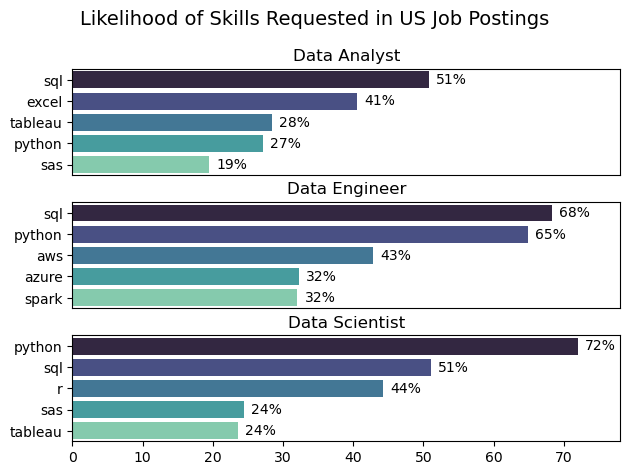

In [10]:
fig, ax = plt.subplots(len(job_titles), 1)



for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette=sns.color_palette('mako', n_colors=5)[::-1]) #n_colors is for when you only are showing X amount of things in the graph, so, you put head(5), you're going to show only 5 skills, limit it to only 5 colors! Mako shows more than 5, i believe 6 so its better to just stop it at 5.
    ax[i].set_title(job_title)
    #ax[i].invert_yaxis() # this is what you use when you have [i], you tell ax how and what to do. I did this using matplot, since i've changed it to seaborn to make it more apassing to the eye i dont need this now!
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=14)
plt.tight_layout(h_pad=0.5) # remember to always fix overlap. It is a good practice to make every chart look GOOD to the eye. h_pad makes it like a padding, sort of.
plt.show()